In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.drop(['id'], axis=1, inplace=True)

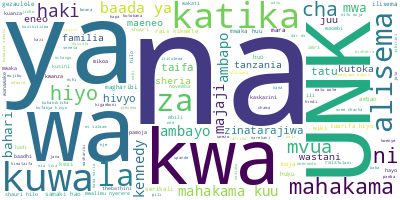

In [4]:
from wordcloud import WordCloud
long_string = ','.join(list(df['text'].values))


wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [8]:
import gensim
from gensim.utils import simple_preprocess
import nltk

stop_words_df = pd.read_csv("Swahili_Stopwords.csv")

In [10]:
for col in stop_words_df.columns:
    print(col)

StopWords


In [12]:
stop_words = stop_words_df['StopWords'].tolist()

In [14]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [15]:
data = df['text'].tolist()
data_words = list(sent_to_words(data))

In [17]:
# remove stop words
data_words = remove_stopwords(data_words)

In [18]:
print(data_words[:1][0][:30])

['taarifa', 'ilisema', 'ongezeko', 'joto', 'maji', 'wastani', 'bahari', 'unk', 'inaashiria', 'kuwepo', 'mvua', 'el', 'nino', 'unk', 'mwishoni', 'april', 'ishirini', 'sifuri', 'imeelezwa', 'ongezeko', 'joto', 'magharibi', 'bahari', 'hindi', 'linatarajiwa', 'kuhamia', 'bahari', 'hali', 'ambayo', 'itasababisha']


In [19]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 4), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [20]:
from pprint import pprint

# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"unk" + 0.022*"mvua" + 0.015*"kusini" + 0.015*"wastani" + '
  '0.015*"kuanza" + 0.015*"zinatarajiwa" + 0.015*"alisema" + 0.015*"fulani" + '
  '0.012*"majaji" + 0.010*"haki"'),
 (1,
  '0.062*"unk" + 0.026*"kennedy" + 0.011*"familia" + 0.011*"hilo" + '
  '0.011*"eneo" + 0.011*"mahakama" + 0.011*"alisema" + 0.011*"rais" + '
  '0.008*"hayo" + 0.008*"akionesha"'),
 (2,
  '0.050*"unk" + 0.025*"haki" + 0.017*"mahakama" + 0.014*"alisema" + '
  '0.013*"uwezo" + 0.013*"ndio" + 0.013*"kutenda" + 0.013*"mwaka" + '
  '0.010*"kufanya" + 0.010*"mamlaka"'),
 (3,
  '0.018*"unk" + 0.017*"mwaka" + 0.014*"taifa" + 0.013*"kuu" + 0.012*"alisema" '
  '+ 0.010*"kunyesha" + 0.010*"nne" + 0.010*"wiki" + 0.010*"dodoma" + '
  '0.010*"singida"'),
 (4,
  '0.026*"unk" + 0.020*"ambayo" + 0.019*"kaskazini" + 0.017*"mbili" + '
  '0.014*"bahari" + 0.013*"alisema" + 0.012*"nchi" + 0.012*"ikiwa" + '
  '0.010*"samaki" + 0.009*"shauri"'),
 (5,
  '0.019*"alisema" + 0.019*"kutokana" + 0.019*"nyerere" + 0.019*"mw

In [29]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_10')

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_10'+'.html')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
LDAvis_prepared

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.049120  0.164465       1        1  20.788297
8     -0.082818  0.038718       2        1  13.197749
9      0.130365  0.036166       3        1  10.148281
0      0.071033 -0.033889       4        1   9.904958
7     -0.124858 -0.022543       5        1   9.803649
2      0.018909 -0.072018       6        1   9.022614
6      0.000875 -0.041528       7        1   8.793269
4     -0.072741 -0.088573       8        1   8.589640
3      0.053097 -0.026485       9        1   5.824631
5      0.055258  0.045687      10        1   3.926912, topic_info=          Term       Freq      Total Category  logprob  loglift
106   mahakama  15.000000  15.000000  Default  30.0000  30.0000
216    kennedy   6.000000   6.000000  Default  29.0000  29.0000
100       haki   6.000000   6.000000  Default  28.0000  28.0000
61        tatu   5.000000   5.000000  Default  27.0000  27.0000
2       bahari   5.000000   5.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
110       rais   0.438993   6.770046  Topic10  -4.5329   0.5015
100       haki   0.429840   6.035262  Topic10  -4.5540   0.5954
408  gezaulole   0.406801   3.841549  Topic10  -4.6091   0.9920
419     chacha   0.404629   3.211348  Topic10  -4.6144   1.1658
425       mzee   0.404601   3.179719  Topic10  -4.6145   1.1757

[517 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
448       3  0.773622        agosti
325       2  0.561007         ajili
481       7  0.788899     akielezea
474       1  0.899581     akionesha
172       3  0.773610  akizungumzia
...     ...       ...           ...
190       8  0.874529          zipo
38        1  0.525027          ziwa
38        8  0.525027          ziwa
191       8  0.874525        ziweze
324       5  0.719787          zote

[557 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 10, 1, 8, 3, 7, 5, 4, 6])